In [1]:
!python --version

Python 3.10.9


In [2]:
import adelio            as aio
import matplotlib.pyplot as plt
import numpy             as np
import os
import preprocessing     as pre 
import processing        as pro

### Experiences

IndexError: index 1551 is out of bounds for axis 1 with size 1551

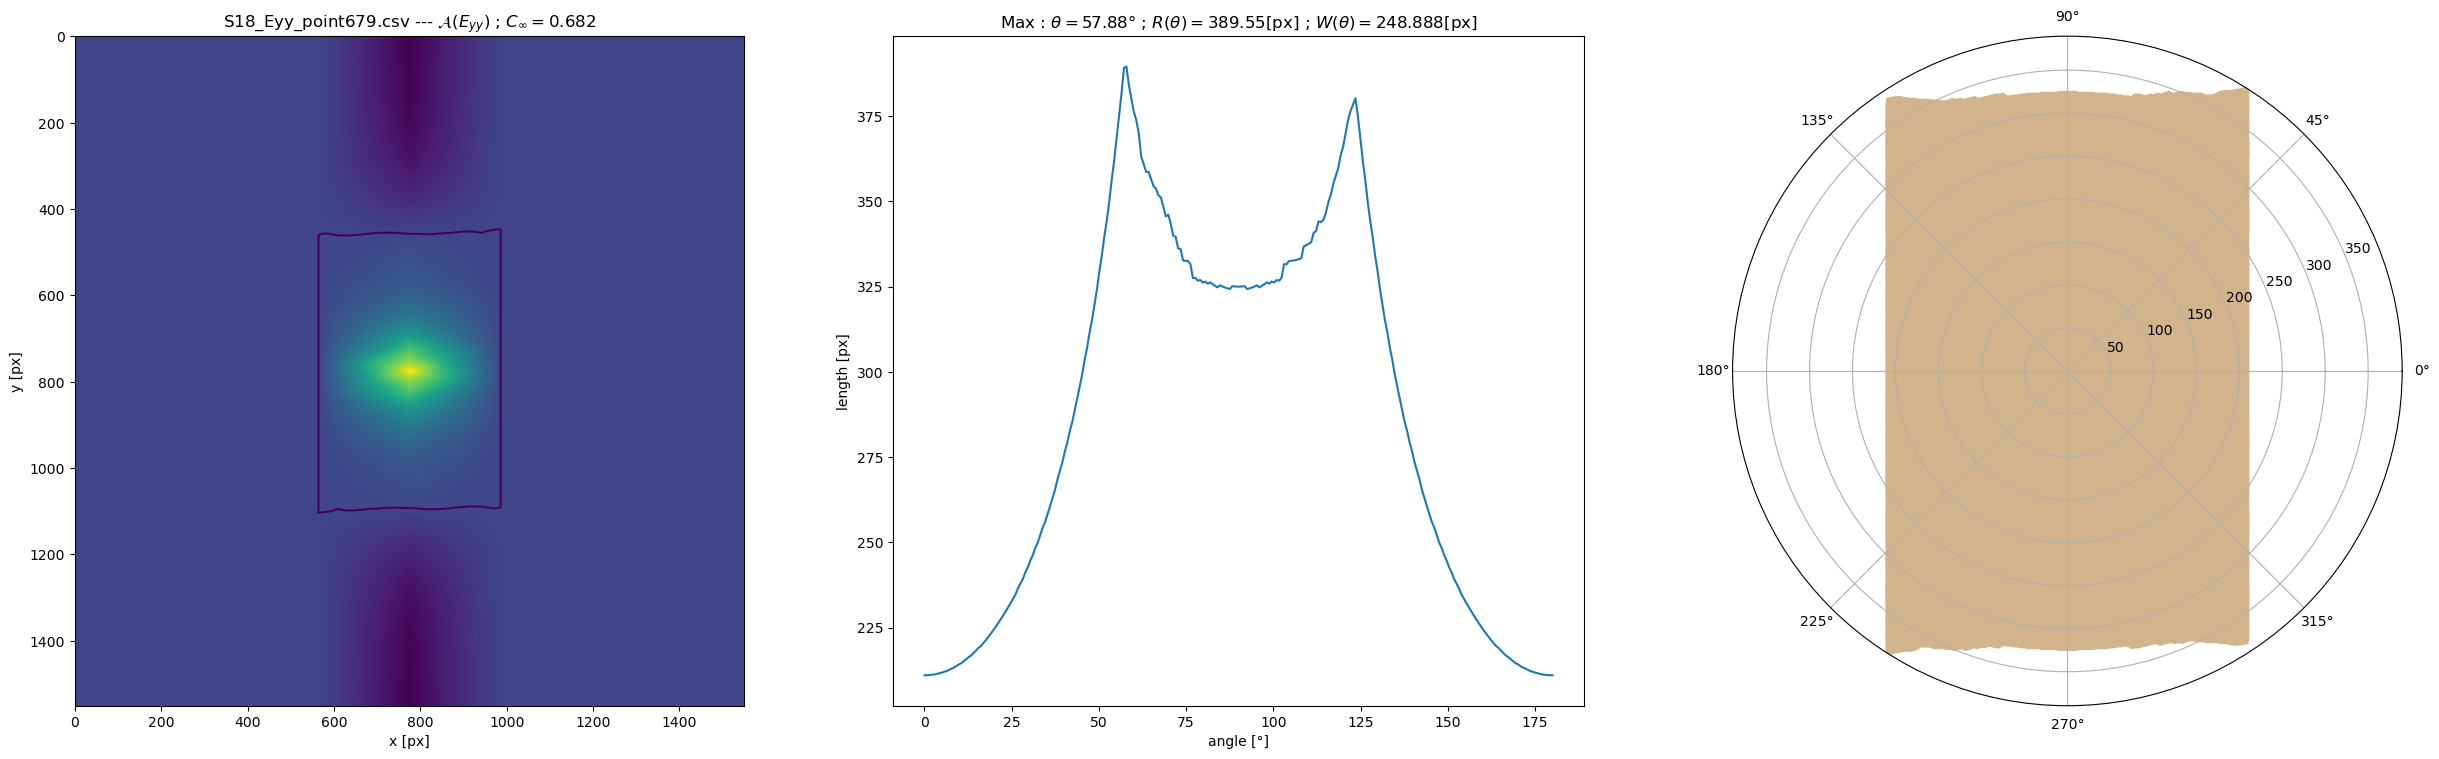

In [3]:
basepath         = "C:\\Users\\julie\\Documents\\experiences"
experience_names = os.listdir(basepath)


nrows = len(experience_names)
ncols = 4
size  = 10
fig   = plt.figure(figsize=(ncols*size+1, nrows*size))


angles = np.linspace(0, np.pi, 256)
angles_ = np.hstack((angles, np.pi+angles))


for n, experience_name in enumerate(experience_names):

    path = os.path.join(basepath, experience_name)    # Build the absolute path to the file
    eyy  = pre.exp2pic(path)                          # Call the reading function


    # Compute the autocorrelation and C_inf
    eyy_auto = pro.autocorrelation(eyy)
    eyy_cinf = pro.cinf(eyy)


    # Plot the autocorrelation with the contour of C_inf
    axe = fig.add_subplot(nrows, ncols, n*ncols+1)
    axe.imshow(eyy_auto)
    axe.contour(eyy_auto, [eyy_cinf, 1])
    axe.set_xlabel("x [px]")
    axe.set_ylabel("y [px]")
    axe.set_title(f"{experience_name} --- "+"$\mathcal{A}(E_{yy})$ ; $C_\infty=$"+"{:.3f}".format(eyy_cinf))


    # Compute the length versus the angle : L(angle) then polar plot
    eyy_length = np.zeros_like(angles)
    for i in range(eyy_length.shape[0]):
        eyy_length[i] = pro.length_vs_angle(eyy_auto, eyy_cinf, angles[i])
    
    eyy_width = pro.length_vs_angle(eyy_auto, eyy_cinf, angles[eyy_length.argmax()]+np.pi/2)
    
    eyy_length_ = np.hstack((eyy_length, eyy_length))

    axe = fig.add_subplot(nrows, ncols, n*ncols+2)
    axe.plot(angles*180/np.pi, eyy_length)
    axe.set_xlabel("angle [°]")
    axe.set_ylabel("length [px]")
    axe.set_title("Max : $\\theta=$"+"{:.2f}".format(angles[eyy_length.argmax()]*180/np.pi)+"° ; $R(\\theta) =$"+"{:.2f}".format(eyy_length.max())+"[px] ; $W(\\theta) =$"+"{:.3f}".format(eyy_width)+"[px]")

    axe = fig.add_subplot(nrows, ncols, n*ncols+3, projection="polar")
    axe.fill(angles_, eyy_length_, color="tan")
    axe.set_rmax(eyy_length.max())

    # Extract the radial profile in the direction of the min
    r, eyy_r, auto_r = pro.radial_profile(eyy, angles[eyy_length.argmax()]+np.pi/2)

    axe = fig.add_subplot(nrows, ncols, n*ncols+4)
    axe.plot(r, auto_r)
    axe.hlines(y=eyy_cinf, xmin=r[0], xmax=r[-1])
    axe.set_xlabel("Distance [px]")
    axe.set_ylabel("$\\mathcal{A}(E_{yy})$")


plt.savefig("09_experiences.jpg")
plt.show()